# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-03 12:01:23--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-03 12:01:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.09s   

2025-03-03 12:01:25 (966 KB/s) - ‘Ec

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


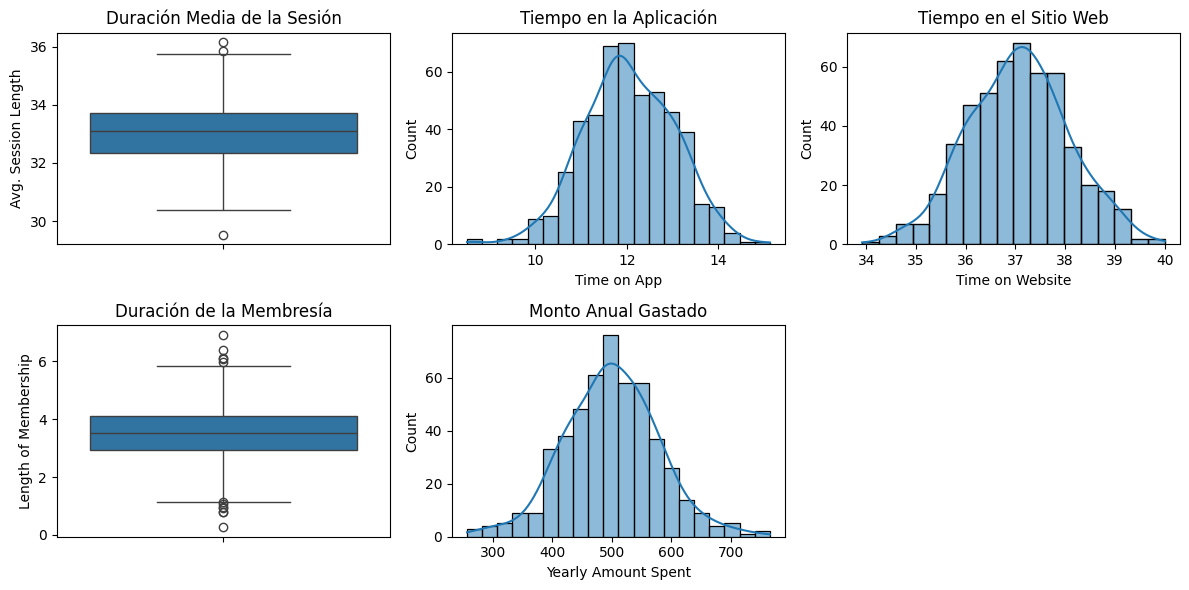

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.boxplot(y='Avg. Session Length', data=df)
plt.title('Duración Media de la Sesión')

plt.subplot(2, 3, 2)
sns.histplot(df['Time on App'], kde=True)
plt.title('Tiempo en la Aplicación')


plt.subplot(2, 3, 3)
sns.histplot(df['Time on Website'], kde=True)
plt.title('Tiempo en el Sitio Web')

plt.subplot(2, 3, 4)
sns.boxplot(y='Length of Membership', data=df)
plt.title('Duración de la Membresía')

plt.subplot(2, 3, 5)
sns.histplot(df['Yearly Amount Spent'], kde=True)
plt.title('Monto Anual Gastado')

plt.tight_layout()
plt.show()


## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [6]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(400, 4) (100, 4) (400,) (100,)


## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [8]:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)


Intercepto: -1044.2574146365582
Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


predictions = lm.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 109.8637411839399
Mean Absolute Error (MAE): 8.558441885315231
R-squared (R²): 0.9778130629184127


## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

De acuerdo con el modelo de regresión lineal, la variable que mejor explica el gasto anual de los clientes es la "Length of Membership" (Duración de la membresía).  Esto indica que los clientes que llevan más tiempo suscritos tienden a gastar más dinero anualmente.  Le sigue en importancia el "Time on App" (Tiempo en la aplicación), sugiriendo que una mayor interacción con la aplicación móvil está correlacionada con un aumento en el gasto.  "Avg. Session Length" (Duración promedio de la sesión) y "Time on Website" (Tiempo en el sitio web) muestran menor influencia en el gasto anual en comparación con las dos variables anteriores.


Basándonos en los resultados del modelo, se proponen las siguientes acciones para aumentar el gasto anual:

1. **Fidelización de clientes**
2. **Mejorar la experiencia en la aplicación móvil**
3. **Análisis adicional del sitio web**

El modelo de regresión lineal, si bien proporciona una visión inicial valiosa, presenta algunas limitaciones:

1. **Variables no consideradas**
2. **Relaciones lineales**
3. **Efecto de variables ocultas**


Para mejorar el modelo, se recomienda explorar estas variables adicionales y considerar modelos de regresión más complejos que puedan capturar posibles no linealidades.  También es importante analizar datos externos para incorporar posibles influencias de variables no capturadas por este análisis inicial.


# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!